In [2]:
import matplotlib.pyplot as plt
import os
import numpy as np
from numpy import genfromtxt
import pandas as pd

In [18]:
_dir1 = '/content/drive/MyDrive/Colab Notebooks/SynteticCurves/bd/classes/'
_dir2 = '/content/drive/MyDrive/Colab Notebooks/SynteticCurves/bd_syntetic/'

#idx = [0,1,2,4,5]
idx = [6]
for i in idx:
  meter = pd.read_csv(_dir1 + 'medidores_'+str(3)+'.csv')
  meter_syn = pd.read_csv(_dir2 + 'new_transf'+str(6)+'_40p.csv', header=None)

Dimensao dados -->  (1593, 96)


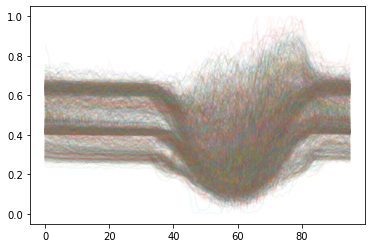

Dimensao dados -->  (9385, 96)


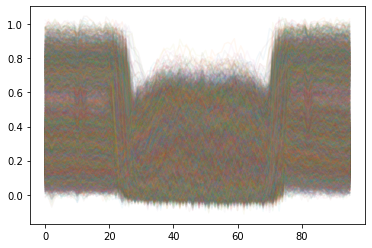

In [19]:
my_data = meter.iloc[:,1:].values
print('Dimensao dados --> ', my_data.shape)
for i in range(my_data.shape[0]):
  plt.plot(my_data[i], alpha=.05)
plt.show() 

my_data = meter_syn.values
print('Dimensao dados --> ', my_data.shape)
for i in range(my_data.shape[0]):
  plt.plot(my_data[i], alpha=.05)
plt.show() 

In [7]:
M = meter_syn.values
M[M<0] = 0
M[M>1] = 1
medias1 = M.mean(axis=1)
std1 = M.std(axis=1)

(array([0.0247578 , 0.09257266, 0.12378902, 0.17438105, 0.23896663,
        0.18729817, 0.07750269, 0.0409042 , 0.03013994, 0.00968784]),
 array([0.65823204, 0.69052456, 0.72281707, 0.75510959, 0.7874021 ,
        0.81969461, 0.85198713, 0.88427964, 0.91657216, 0.94886467,
        0.98115719]),
 <a list of 10 Patch objects>)

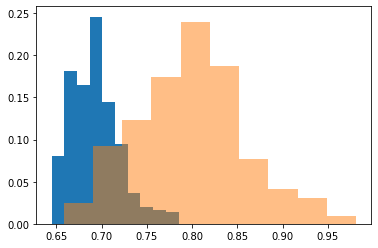

In [8]:
M = meter.iloc[:,1:].values
M[M<0] = 0
M[M>1] = 1
medias2 = M.mean(axis=1)
std2 = M.std(axis=1)

plt.hist(medias1,weights=np.ones(len(medias1))/len(medias1))
plt.hist(medias2,weights=np.ones(len(medias2))/len(medias2),alpha=0.5)

(array([0.00753498, 0.01184069, 0.03013994, 0.02906351, 0.07857912,
        0.17653391, 0.2583423 , 0.20667384, 0.15285253, 0.04843918]),
 array([0.02764331, 0.0645089 , 0.1013745 , 0.13824009, 0.17510569,
        0.21197129, 0.24883688, 0.28570248, 0.32256808, 0.35943367,
        0.39629927]),
 <a list of 10 Patch objects>)

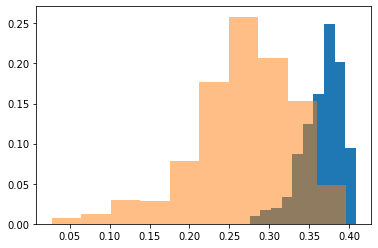

In [9]:
plt.hist(std1,weights=np.ones(len(std1))/len(std1))
plt.hist(std2,weights=np.ones(len(std2))/len(std2),alpha=0.5)

In [10]:
meter_A = meter.iloc[:,1:].values.ravel()
meter_syn_A = np.abs(meter_syn.values.ravel())

(array([0.10834035, 0.06667368, 0.05646745, 0.04517396, 0.039422  ,
        0.03528339, 0.03672138, 0.0398078 , 0.0457702 , 0.52633979]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

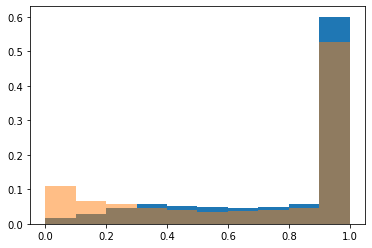

In [11]:
plt.hist(meter_A,weights=np.ones(len(meter_A))/len(meter_A))
plt.hist(meter_syn_A,weights=np.ones(len(meter_syn_A))/len(meter_syn_A),alpha=0.5)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


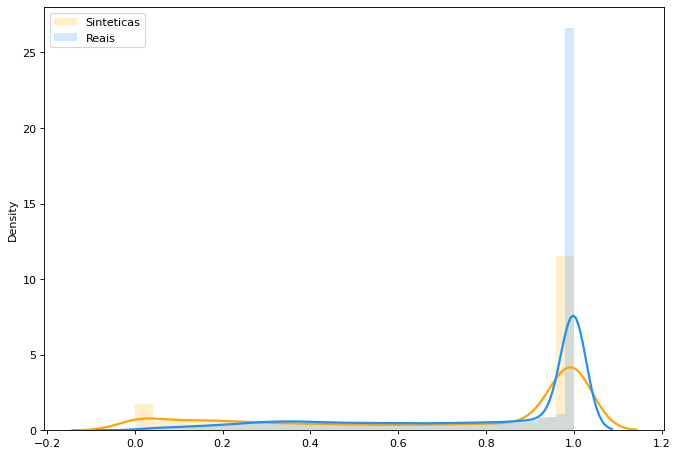

In [12]:
import seaborn as sns
plt.figure(figsize=(10,7), dpi= 80)
kwargs = dict(hist_kws={'alpha':.2}, kde_kws={'linewidth':2})
sns.distplot(meter_syn_A, color="orange", label="Sinteticas", **kwargs)
sns.distplot(meter_A, color="dodgerblue", label="Reais" , **kwargs)
plt.legend();

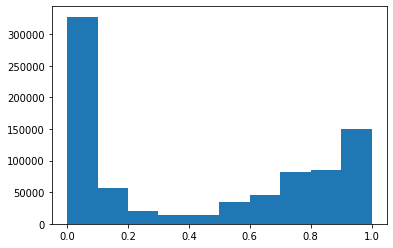

In [64]:
gr = plt.hist(meter_A)
p = gr[0]/sum(gr[0])


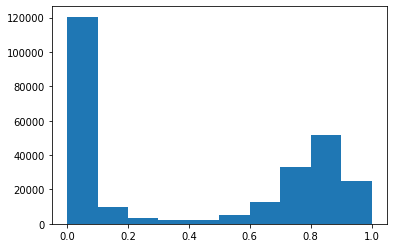

In [66]:
# example of calculating the kl divergence (relative entropy) with scipy
from scipy.special import rel_entr
kl_pq = rel_entr(p, q)
print('KL(P || Q): %.3f nats' % sum(kl_pq))
# calculate (Q || P)
kl_qp = rel_entr(q, p)
print('KL(Q || P): %.3f nats' % sum(kl_qp))

KL(P || Q): 0.098 nats
KL(Q || P): 0.092 nats


In [67]:
import scipy
from scipy.stats import norm
from scipy.stats import rv_histogram

#Make distribution objects of the histograms
histogram_dist_train = rv_histogram(np.histogram(meter_A, bins='auto'))
histogram_dist_valid = rv_histogram(np.histogram(meter_syn_A, bins='auto'))

#Generate arrays of pdf evaluations
X1 = np.linspace(np.min(meter_A), np.max(meter_A), 1000)
X2 = np.linspace(np.min(meter_syn_A), np.max(meter_syn_A), 1000)
rvs_train = [histogram_dist_train.pdf(x) for x in X1]
rvs_valid = [histogram_dist_valid.pdf(x) for x in X2]

#Calculate the Kullback–Leibler divergence between the different datasets
entropy_train_valid = scipy.special.rel_entr(rvs_train, rvs_valid)   
kl_div_train_valid = np.sum(entropy_train_valid)

#Print the values of the Kullback–Leibler divergence
print(f"Kullback–Leibler divergence between training and validation dataset: {entropy_train_valid.mean()}")

Kullback–Leibler divergence between training and validation dataset: 0.1899886100478106


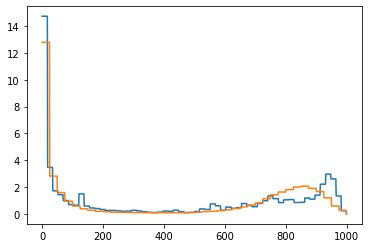

In [68]:
plt.plot(rvs_train)
plt.plot(rvs_valid)